# Investigation of IPR in the Floquet Dynamics of Many Body Systems

We're trying to look at localization/freezing in rapidly driven time-periodic systems. Specifically, we want to check whether freezing exists in long raange spin systems in the manner seen for short range systems. We start by defining the *Inverse Participation Ratio* (IPR) for a wavefunction $\psi(x)$ as 
\begin{equation*}
\phi_{IPR}\equiv \int dx\;\vert\psi(x)\vert^4
\end{equation*}

More generally, the IPR of a state $|\phi\rangle$ in a representation given by complete orthonormal basis $|m\rangle$ is $\phi_{IPR} = \sum_m\vert\langle m \vert\phi\rangle\vert^4$.

In the context of localization, the IPR is useful. The smallest value of the IPR corresponds to a fully delocalized state, $\psi(x)=1/\sqrt{N}$ for a system of size $N$, where the IPR yields $\sum_x |\psi(x)|^4=N/(N^{1/2})^4=1/N$. Values of the IPR close to 1 correspond to localized states. For a periodically driven system, we look at the IPR of the Floquet modes at $t=T$, where $t=2\pi/\omega$ for drive frequency $\omega$.

## Transverse-Field Ising model.
First, consider the well-known Hamiltonian of the driven Transverse Field Ising model of $N$ spins:
\begin{align*}
 H(t) &= H_0 + \left(h_0 + h\cos{\omega t}\right) H_1\\
H_0 &= -\frac{1}{2}\sum_{i} \sigma^x_i \sigma^x_{i+1}\\
H_1 &= -\frac{1}{2}\sum_n^N \sigma^z_{n}
\end{align*}

The TFIM model can be readily transformed into a Bogoliubov-type fermionic system via the Jordan-Wigner transformation. This yields an effective Hamiltonian

\begin{equation*}
\mathcal{H}(t)=\sum_{{k}} \psi_{{k}}^{\dagger}\left(\begin{array}{cc}
h_{z}(t)+f_{{k}} & \Delta_{{k}} \\
\Delta_{{k}}^{*} & -h_{z}(t)-f_{{k}}
\end{array}\right) \psi_{{k}},
\end{equation*}

where $h_z(t) = h_0 + h\cos{\omega t}$, $\psi_k = (c_{-k}, c^\dagger_k)^T$, with $f_k = J\cos{k}$, $\Delta_k = J\sin{k}$.Now, for large $\omega \gg f_k$, the RWA approximation yields an effective Hamiltonian [1]

\begin{equation*}
H_{RWA}(t)=-\sum_{{k}}\Delta_k \phi_{k}^{\dagger}\left(\begin{array}{cc}
0 & i  J_0(2h/\omega)e^{-2itf_k} \\
-i J_0(2h/\omega)e^{2itf_k} & 0
\end{array}\right)\phi_{k}
\end{equation*}
Note that, for a particular $k$, the driven TLS, in the RWA, is $H_k^{rwa} = 2J_0(2h/\omega)\Delta_k\;\left[\sigma_x\cos{\left(2f_kt\right)} - \sigma_y\sin{\left(2f_kt\right)}\right]$

For the exact dynamics, a particular Floquet mode can be written as $|\phi\rangle = \prod_{k>0}|\phi^n_k\rangle$. We plot the reduced IPR, defined for the two values of $|\phi^n_k\rangle\; \forall k$ to be
\begin{equation*}
\phi^{(n)}_{IPR}(k) = \left\vert \langle 0 |\phi^n_k\rangle  \right\vert^4 + \left\vert \langle +k, -k |\phi^n_k\rangle  \right\vert^4,
\end{equation*}
where $n=0,1$. The code cell below plots $\phi^n_{PR}(k)$.



## References:

[1] Das, A. arXiv:0904.2172 (2009)

In [4]:
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

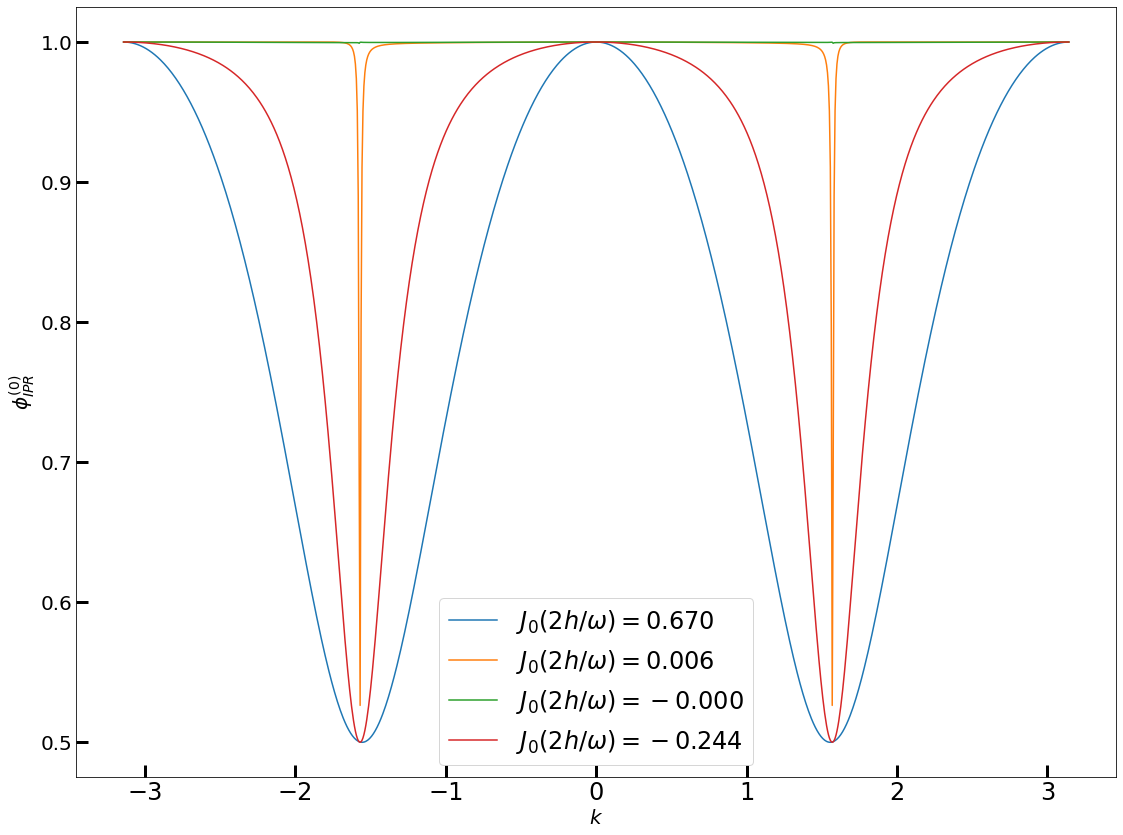

CPU times: user 10.5 s, sys: 7.61 ms, total: 10.5 s
Wall time: 10.5 s


In [199]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
from tqdm import tqdm
import traceback

plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

freezing_pts = jn_zeros(0, 5)
max_pts = jn_zeros(1,5)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2
hmed = 0.995 * omega * freezing_pts/2
hmax = 1.25 * omega * max_pts/2
hfin = 0.5 * omega * freezing_pts/2


delta = 1e-4
fbz = np.linspace(-np.pi+delta, np.pi-delta, 1000)

for h in np.sort([hfrz[0], hmed[0], hmax[0], hfin[0]]):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    plt.plot(fbz, iprvals_exact[:,0], label=fr"$J_0(2h/\omega)={j0(2*h/w):1.3f}$")

plt.ylabel(f'$\phi^{{({{0}})}}_{{IPR}}$')
plt.xlabel(r'$k$')
plt.legend()

plt.show()

The plots above are for the **exact** dynamics of the TFIM in Fermionic representation, with the reduced IPR plotted for the entire Brillouin zone for a few drive amplitudes. The frequency is set to $\omega = 90$ and the IPR of one of the two Floquet modes are plotted at time $t=T$ for $4$ chosen amplitudes. As can be seen, the exact result is consistent with the RWA approximation. When $J_0(2h/\omega) = 0$, the RWA Hamiltonian vanishes, yielding an IPR of unity. At other points, the IPR is unity only when $k=\pm \pi$ (since $\Delta_k=0$) and $k=0$ (since $f_k = 0$ and the Hamiltonian for each $k$ $\sim \sigma_x$); other than that, there is "delocalization" due to the ensuing dynamics.

In [48]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_points = jn_zeros(0,3)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2

delta = 1e-7
fbz = np.linspace(-np.pi+delta, np.pi-delta, 100)
hvals = np.linspace(0.0, 7*omega, 200)
#include freezing points
hvals = np.sort(np.append(hvals, hfrz))

iprmat = np.empty([len(hvals), len(fbz)])
for x, h in tqdm(enumerate(hvals)):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    iprmat[x,:] = iprvals_exact[:,0]

205it [01:01,  3.32it/s]

CPU times: user 1min 1s, sys: 137 ms, total: 1min 2s
Wall time: 1min 1s


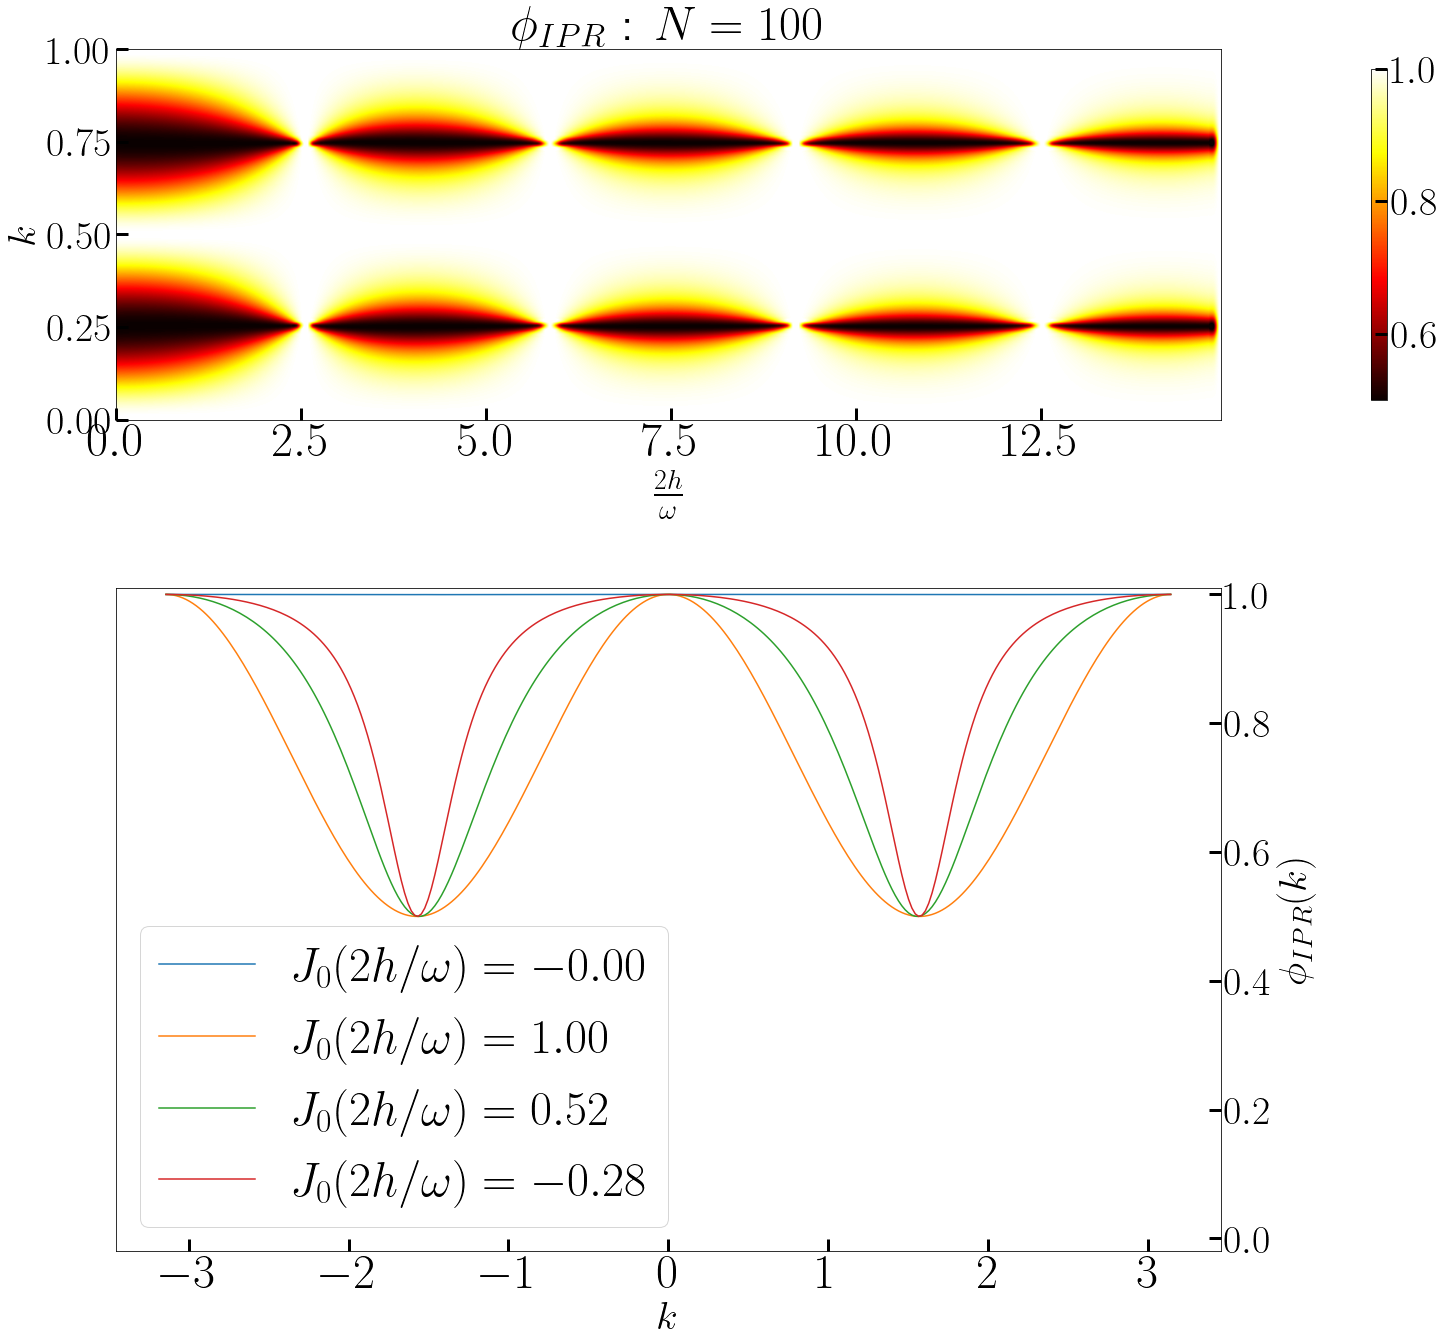

In [51]:
import matplotlib.pyplot as plt
from scipy.special import j0,jn_zeros
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

freezing_pts = jn_zeros(0,3)

etas = 2 * hvals/w

fig = plt.figure(tight_layout=False, constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {len(fbz)}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{2h}{\omega}$')
ipr_ax.set_ylabel(r'$k$')


im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.5)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[0], atol=1e-8))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.2))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = fbz
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$J_0(2h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$k$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(k)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
plt.savefig("ising_ipr.png", dpi=200)
plt.show()

## The Disordered TF Ising model

If we now add spatial disorder to the bonds and fields, the Ising Hamiltonian reads

\begin{equation*}
H(t)=-J \sum_{i}^{N-1} \big(1+\alpha J_{i}\big) \sigma_{i}^{x} \sigma_{i+1}^{x}-\sum_{i}^{N}\left\{h_{0} \sin (\omega t)+\alpha h_{i}\right\} \sigma_{i}^{z}
\end{equation*}

where $J_i, h_i$ are random numbers drawn from the range $[-1,1]$, and $\alpha$ is the disorder strength. A Jordan-Wigner transformation to fermions leads to the Hamiltonian [REFS: fate paper and Bigan Mbeng et al 2020]
\begin{equation*}
\widehat{H}(t)=\left(\hat{\mathbf{c}}^{\dagger}, \hat{\mathbf{c}}\right)\left(\begin{array}{cc}
\mathbf{A}(t) & \mathbf{B} \\
-\mathbf{B} & -\mathbf{A}(t)
\end{array}\right)\left(\begin{array}{l}
\hat{\mathbf{c}} \\
\hat{\mathbf{c}}^{\dagger}
\end{array}\right),
\end{equation*}
with the Nambu Spinors
\begin{equation*}
\left(\hat{\mathbf{c}}^{\dagger}, \hat{\mathbf{c}}\right) = \left(\hat{c}_{1}^{\dagger}, \cdots, \hat{c}_{N}^{\dagger}, \hat{c}_{1}, \cdots, \hat{c}_{N}\right),
\end{equation*}
and the matrices
\begin{align*}
\mathbf{A}(t) &= h(t)\times\mathbf{1} +\alpha \big(\mathbf{h} + \mathbf{J}/2\big)+\mathbf{D}/2\\
\mathbf{B}(t) &=\frac12 \big(\mathbf{\overline{D}} + \alpha J \mathbf{\overline{J}}\big)\\
h(t) &= h_0 + h\cos{\omega t}.
\end{align*}
Here, the matrix components of $\mathbf{h}$ are $\mathbf{h}_{ij} = h_i\delta_{ij}$, the matrix $\mathbf{J}$ is a tridiagonal symmetric matrix with components $J_i$ along the super and sub-diagonals, and $\mathbf{\overline{J}}$ is a tridiagonal antisymmetric matrix with components $\mp J_i$ along the super (sub) diagonals. Finally, the matrix $\mathbf{D}$ is a tridiagonal symmetric matrix with $1$ along the super and sub-diagonals, and $\mathrm{\overline{D}}$ is a tridiagonal anti-symmetric matrix with $\mp 1$ along the super (sub) diagonals.

Thus, the dynamics of the full system lies entirely on an invariant subspace of size $2N\times 2N$. Note that the formulae above only hold for open boundary conditions. The IPR of the Floquet states can now be computed in a manner similar to the clean Ising model discussed above, except with $2N$ components. In more qutip-friendly notation, the effective $2N\times 2N$ Hamiltonian 
\begin{align*}
\overline{H}(t) &= \overline{H}_0 + h(t)\overline{H}_1\\
\overline{H}_0 &=  \begin{pmatrix}\alpha \big(\mathbf{h} + \mathbf{J}/2\big) + \mathbf{D}/2 & \mathbf{0}\\ \mathbf{0} & -\alpha \big(\mathbf{h}+\mathbf{J}/2\big)-\mathbf{D}/2 \end{pmatrix} + \frac12\begin{pmatrix}\mathbf{0} & \big(\mathbf{\overline{D}} + \alpha J\mathbf{\overline{J}}\big)\\-\big(\mathbf{\overline{D}}+\alpha J\mathbf{\overline{J}}\big) & \mathbf{0}\end{pmatrix}\\
\overline{H}_1 &=  \begin{pmatrix}\mathbf{1} & \mathbf{0} \\ \mathbf{0} & -\mathbf{1} \end{pmatrix}
\end{align*}
Finally, in the actual time evolution, the hamiltonian has to be doubled.

In [11]:
import numpy as np
from qutip.floquet import floquet_modes
from qutip import Qobj
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.sin(w * t)

def get_disorder_hamilts(N, args):
    alpha = args["alpha"]
    # Construct the Hamiltonian
    bonds = np.random.uniform(-1,1,N-1)
    fields = np.random.uniform(-1,1,N)
    
    hmat = np.diag(fields)
    jmat = np.diag(bonds, k=1) + np.diag(bonds, k=-1)
    jmat_bar = -np.diag(bonds, k=1) + np.diag(bonds, k=-1)
    
    dmat = np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
    dmat_bar = - np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
    
    H0 = np.zeros((2*N, 2*N))
    H1 = np.zeros((2*N, 2*N))
    
    H0[0:N,0:N] = alpha * (hmat + jmat/2) + dmat/2
    H0[N:,N:] = -alpha * (hmat + jmat/2) - dmat/2
    
    H0[0:N, N:] = 0.5 * ( dmat_bar + alpha * jmat_bar)
    H0[N:, 0:N] = - 0.5 *(dmat_bar +  alpha * jmat_bar)
    
    d = np.ones(2*N)
    d[N:] = -1
    H1 = np.diag(d)
    return 2 * H0, 2 * H1
    
def get_floquet_isingdisorder(N, args, **kwargs):
    H0, H1 = get_disorder_hamilts(N, args)
    H = [Qobj(H0),[Qobj(H1),drive]] 
    T = 2 * np.pi/args['omega']
    return floquet_modes(H, T, args, **kwargs) 

def get_iprvals_disorder(N, args, **kwargs):
    f_states, f_energies = get_floquet_isingdisorder(N, args, **kwargs)    
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

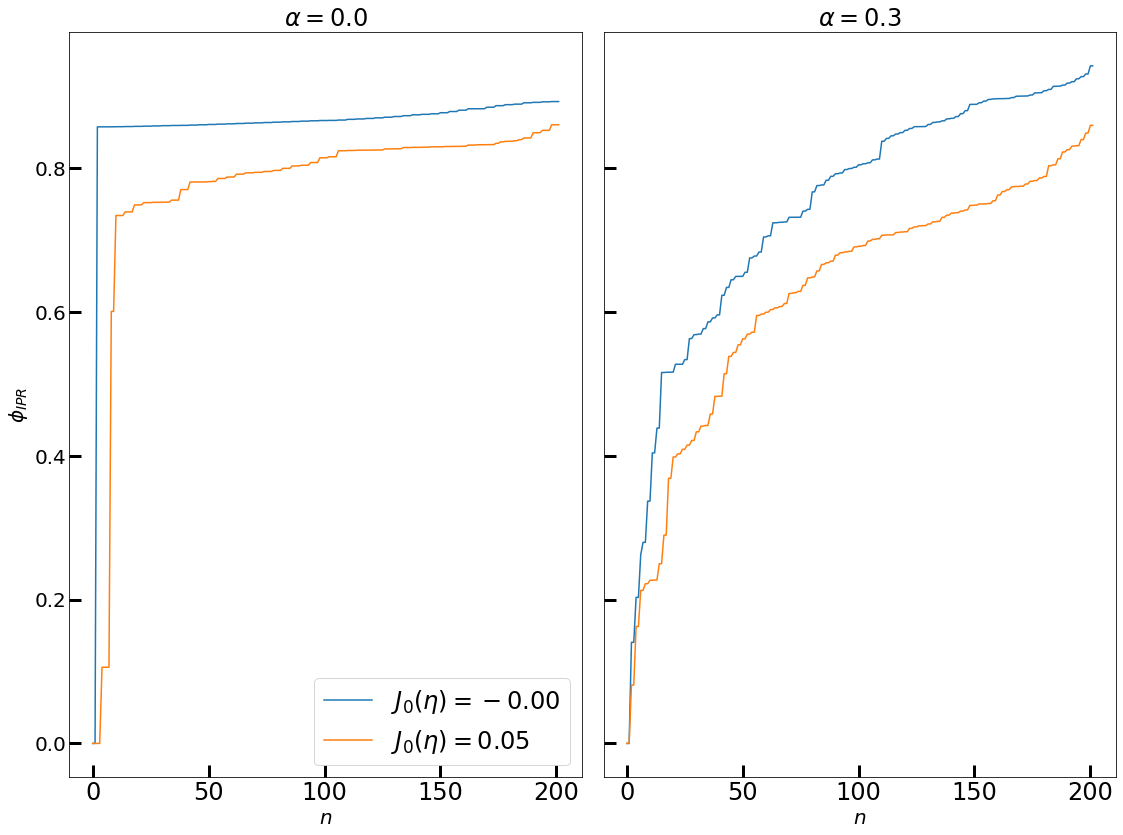

In [50]:
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

N = 101

h0 = 0
h = 7.0
alpha = 0.0

etas = jn_zeros(0,4)
eta = etas[0]
w_frz = 2*h/eta

w_nfrz = h/6

fig, axs = plt.subplots(1,2, sharey=True)

for i, alpha in enumerate([0.0, 0.3]):
    params_frz = {'h0':h0, 'h': h, 'omega': w_frz, 'alpha': alpha}
    params_nfrz = {'h0':h0, 'h': h, 'omega': w_nfrz, 'alpha': alpha}
    axs[i].set_title(r'$\alpha={:1.1f}$'.format(alpha))

    for p in (params_frz, params_nfrz):
        M = get_iprvals_disorder(N, p)
        
        #Ekhane Jali Ache
        axs[i].plot(1-np.sort(M)[::-1]/np.amax(M),label=r'$J_0(\eta) ={:1.2f} $'.format(j0(2*p['h']/p['omega'])))
        
        axs[i].set_xlabel(r'$n$')
        #axs[i].set_ylim(-0.03, 1.03)
        
axs[0].set_ylabel(f'$\phi_{{IPR}}$')
axs[0].legend()
plt.savefig('isingdisorder_ipr_jali.svg')
plt.show()

## The Long-Range case: LMG model

Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}
here,
\begin{eqnarray}
J_{ij} =\frac{J_\alpha}{N^{1-\alpha}}\sum_{(i<j)}^{N}\frac{1}{r_{ij}}=1,\\
\end{eqnarray}
a condition that is necessary in order to keep the energy per spin extensive (linear in $N$). Putting  $\alpha = 0$ yields the **Lipkin Meshkov Glick (LMG)** model with all-to-all interaction, yielding,
\begin{eqnarray}
J_{ij} =\frac{J_0}{N}C^N_2=\frac{J_0}{N}\frac{N(N-1)}{2}=1\\
J_0 = \frac{2}{N-1}=KacN,
\end{eqnarray}
where $KacN$ is the Kac-norm.

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{equation*}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{equation*}

Note that, considering $i<j$ the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{2}{N-1}(S^z)^2 - (h \cos{(\omega t )} + h_0)S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& - 2s^2_i \delta_{ij},\nonumber\\
H_0 &\rightarrow& -2s^2\\
\left(h_1\right)_{ij} &\approx& \sqrt{1 - 4s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
H_1 &\rightarrow& \sqrt{1 - 4s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$.


This Hamiltonian can be simplified in the Rotated Basis as follows. Transform the Hamiltonian to the frame given by the transformation

\begin{equation*}
\hat{U}(t)=\exp \left[i \frac{h}{\omega} \sin (\omega t) \hat{H}_{1}\right]
\end{equation*}

This yields the transformed Hamiltonian

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\left[e^{i 2 \tau \hat{S}^{x}} \hat{S}^{2} e^{-i 2 \tau \hat{S}^{x}}\right],
\end{equation*}
where $\tau = \displaystyle\frac{h}{\omega}\sin{\omega t}$. We use  $e^{i \tau^{\prime} \hat{S^{x}}} \hat{S^{z}} e^{-i \tau^{\prime} \hat{S^{x}}}=\hat{S^{z}} \cos \left(\tau^{\prime}\right)+\hat{S}^{y} \sin \left(\tau^{\prime}\right)$ to evalute  $\tilde{H}(t)$ and we know that $\hat{S}^{2}=\hat{S}^{2}+\hat{S}^{2}+\hat{S}^{2}=\frac{N}{2}\left(\frac{N}{2}+1\right)$. This yields

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\bigg\{\left(\hat{S}^{z}\right)^{2} \cos ^{2}(2 \tau)+\left[\frac{N}{2}\left(\frac{N}{2}+1\right)-\left(\hat{S}^{x}\right)^{2}-\left(\hat{S^{z}}\right)^{2}\right] \sin ^{2}(2 \tau)-\frac{i}{2} \hat{S^{x}} \sin (4 \tau)+\sin (4 \tau) \hat{S^{y}} \hat{S}^{z}  \bigg\}.
\end{equation*}

We now define $\eta\equiv 4h/\omega$ and use the Jacobi-Anger formulae

\begin{align*}
&\cos (\eta \sin\omega t) \equiv J_{0}(z)+2 \sum_{n=1}^{\infty} J_{2 n}(\eta) \cos (2 n \omega t) \\
&\sin (\eta \sin\omega t) \equiv 2 \sum_{n=1}^{\infty} J_{2 n-1}(\eta) \sin [(2 n-1) \omega t]
\end{align*}
to simplify the expression for $\tilde{H}(t)$. This allows us to neglect all oscillating terms to obtain the Rotated Wave Approximation

\begin{equation*}
\tilde{H}_{\mathrm{RWA}}=-\left(\frac{N}{2}+1\right)+\frac{2}{N}\left\{\left(\hat{S}^{x}\right)^{2}-J_{0}\left(\eta\right)\left[\left(\hat{S}^{z}\right)^{2}-\left(\hat{S}^{y}\right)^{2}\right]\right\}
\end{equation*}

Now, when $J_0(\eta)$ vanishes, the RWA Hamiltonian is diagonal in the transverse field representation, yielding an IPR of unity, similar to the Ising case. **However**, this does not seem to be the case for the exact simulations, as can be seen in the plots below.

## References
[1] Check T. Mori's paper equation (12): Mori, T. , arXiV: 1810.01584 (2018)



Now, we look at numerical simulations for $H(t)$ via the IPR of the Floquet state in the representation of the transverse field *i.e.* the eigenstates of $S^x$.

In [2]:
import numpy as np
from qutip import mesolve, basis

def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                      # kacNorm
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    
    f_mat = []
    for i in range(int(2*N+1)):
        baseket = basis(int(2*N+1),i)
        solv_state = mesolve(H, baseket, [0,T], [], [], args = args, options=opts)
        f_mat.append(np.array(solv_state.states)[-1])
        
    return np.array(f_mat)[:,:,0]

print("Definitions complete!")

Definitions complete!


In [11]:
%%time
%load_ext autoreload
%autoreload 2
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 7
h0 = 0.0
omega = 90
nprocs = 13

w = omega

hsteps = 100
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
evec_f = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    floquet_matrix = Qobj(evec_f[xx]).transform(st)
    iprmat[xx,:] = np.sum(np.abs(np.array(floquet_matrix))**4, axis=1)

print("Exact simulation complete!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running for N =  7 with 13 processors


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 6321.25it/s]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 664 ms, sys: 122 ms, total: 786 ms
Wall time: 4.28 s


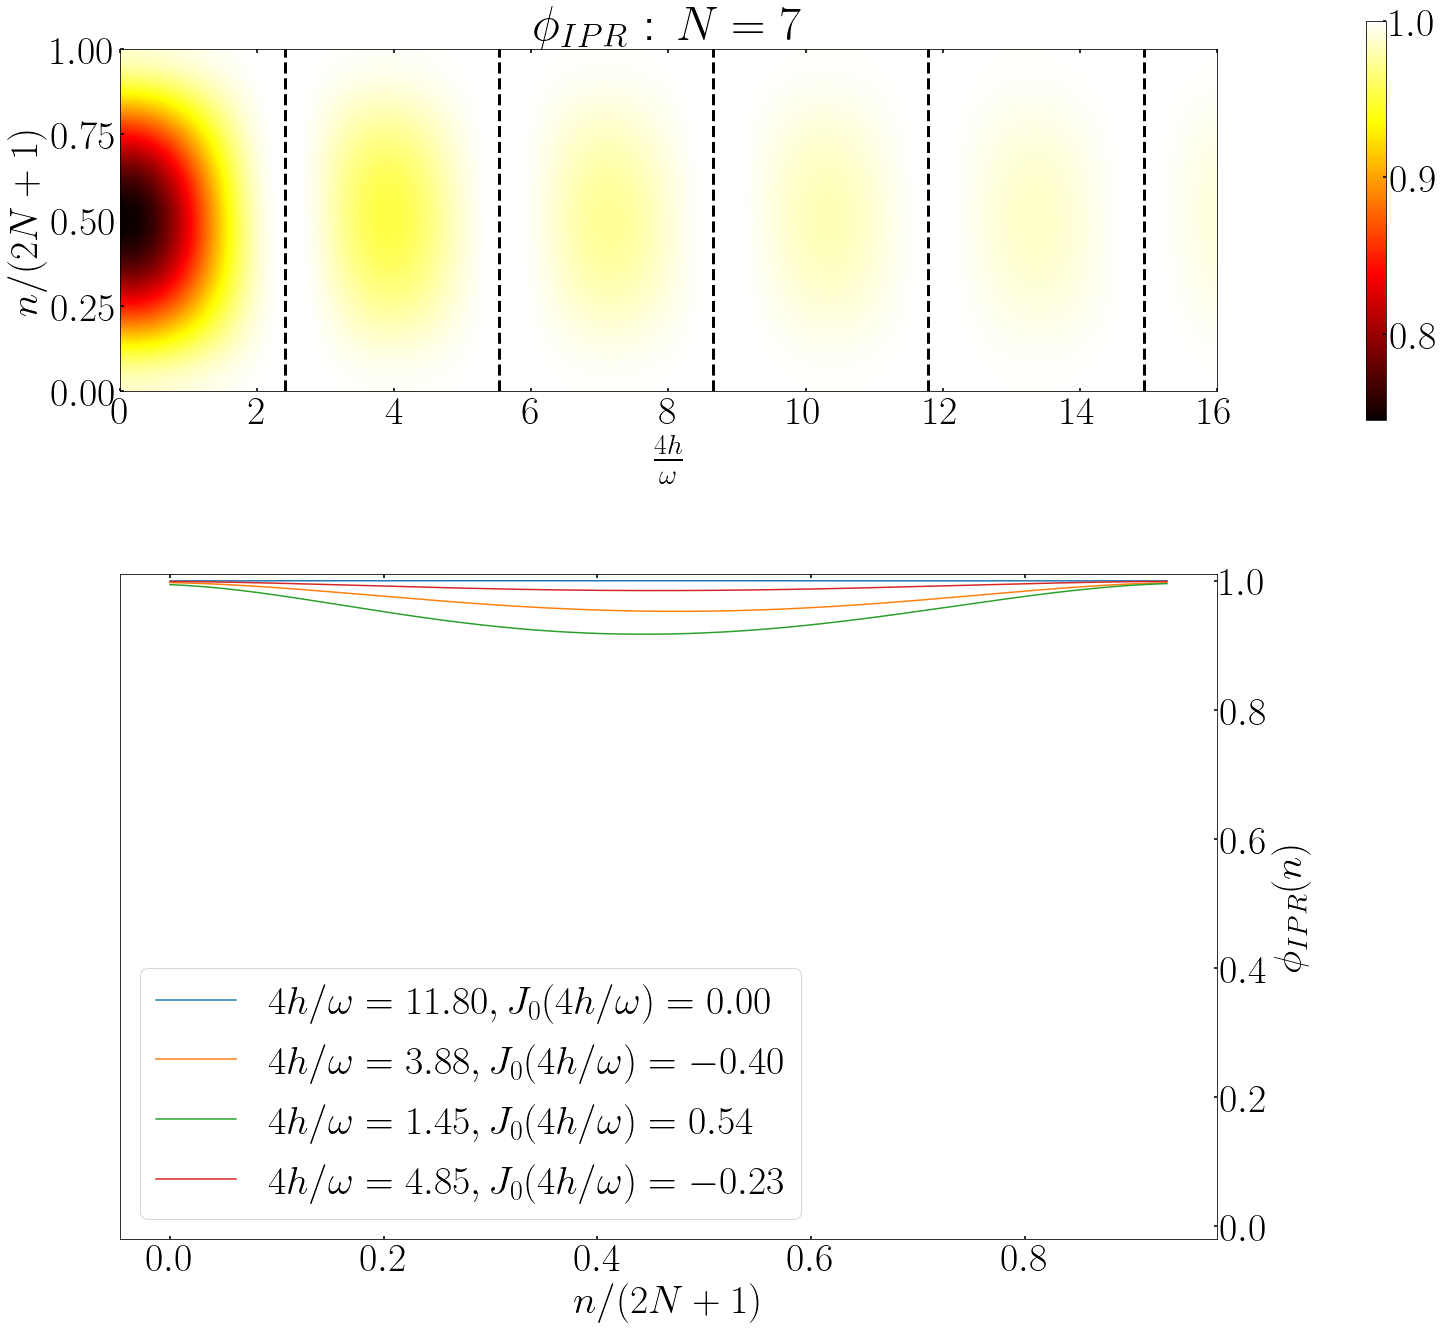

In [24]:
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.09))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
plt.show()

In [25]:
%%time
%load_ext autoreload
%autoreload 2
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 20
h0 = 0.0
omega = 90
nprocs = 13

w = omega

hsteps = 100
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
evec_f = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    floquet_matrix = Qobj(evec_f[xx]).transform(st)
    iprmat[xx,:] = np.sum(np.abs(np.array(floquet_matrix))**4, axis=1)

print("Exact simulation complete!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running for N =  20 with 13 processors


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 17506.72it/s]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 1.25 s, sys: 172 ms, total: 1.42 s
Wall time: 28.9 s


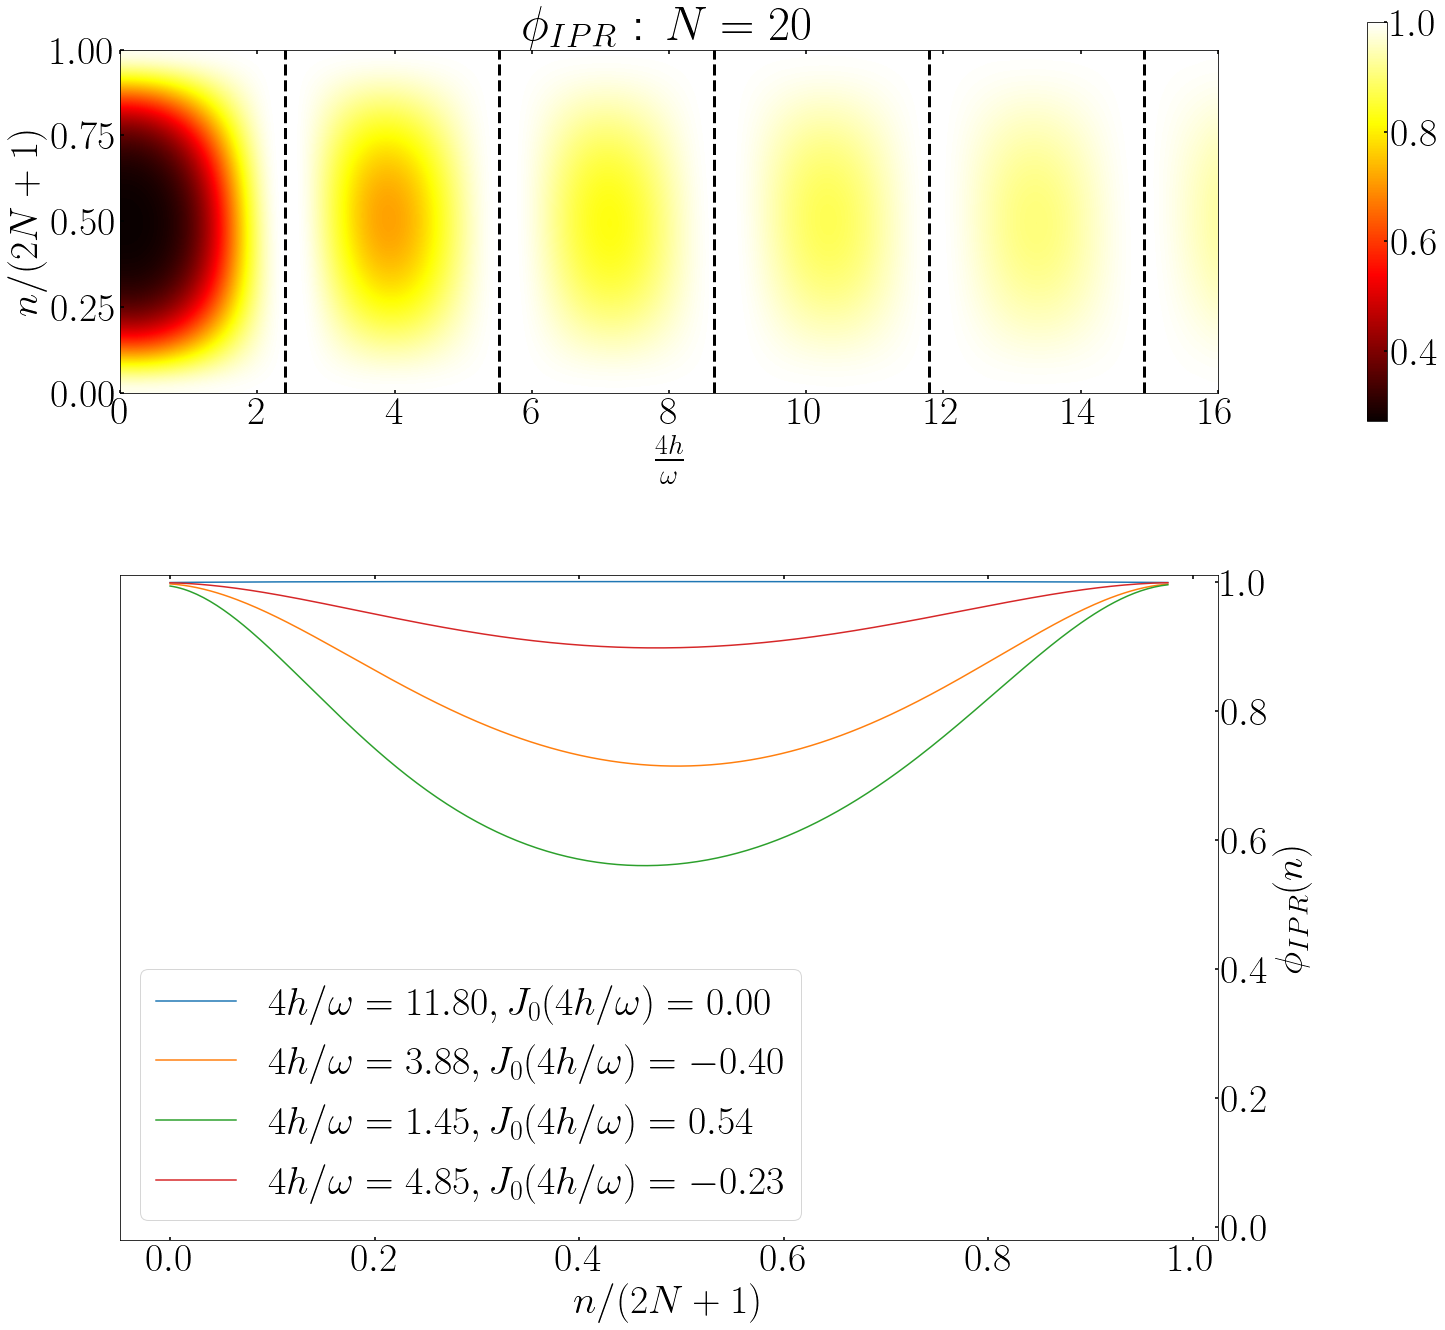

In [26]:
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.09))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
plt.show()

In [3]:
%%time
%load_ext autoreload
%autoreload 2
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 50
h0 = 0.0
omega = 90
nprocs = 13

w = omega

hsteps = 100
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
evec_f = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    floquet_matrix = Qobj(evec_f[xx]).transform(st)
    iprmat[xx,:] = np.sum(np.abs(np.array(floquet_matrix))**4, axis=1)

print("Exact simulation complete!")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running for N =  50 with 13 processors


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 29515.15it/s]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 7.14 s, sys: 259 ms, total: 7.4 s
Wall time: 3min 47s


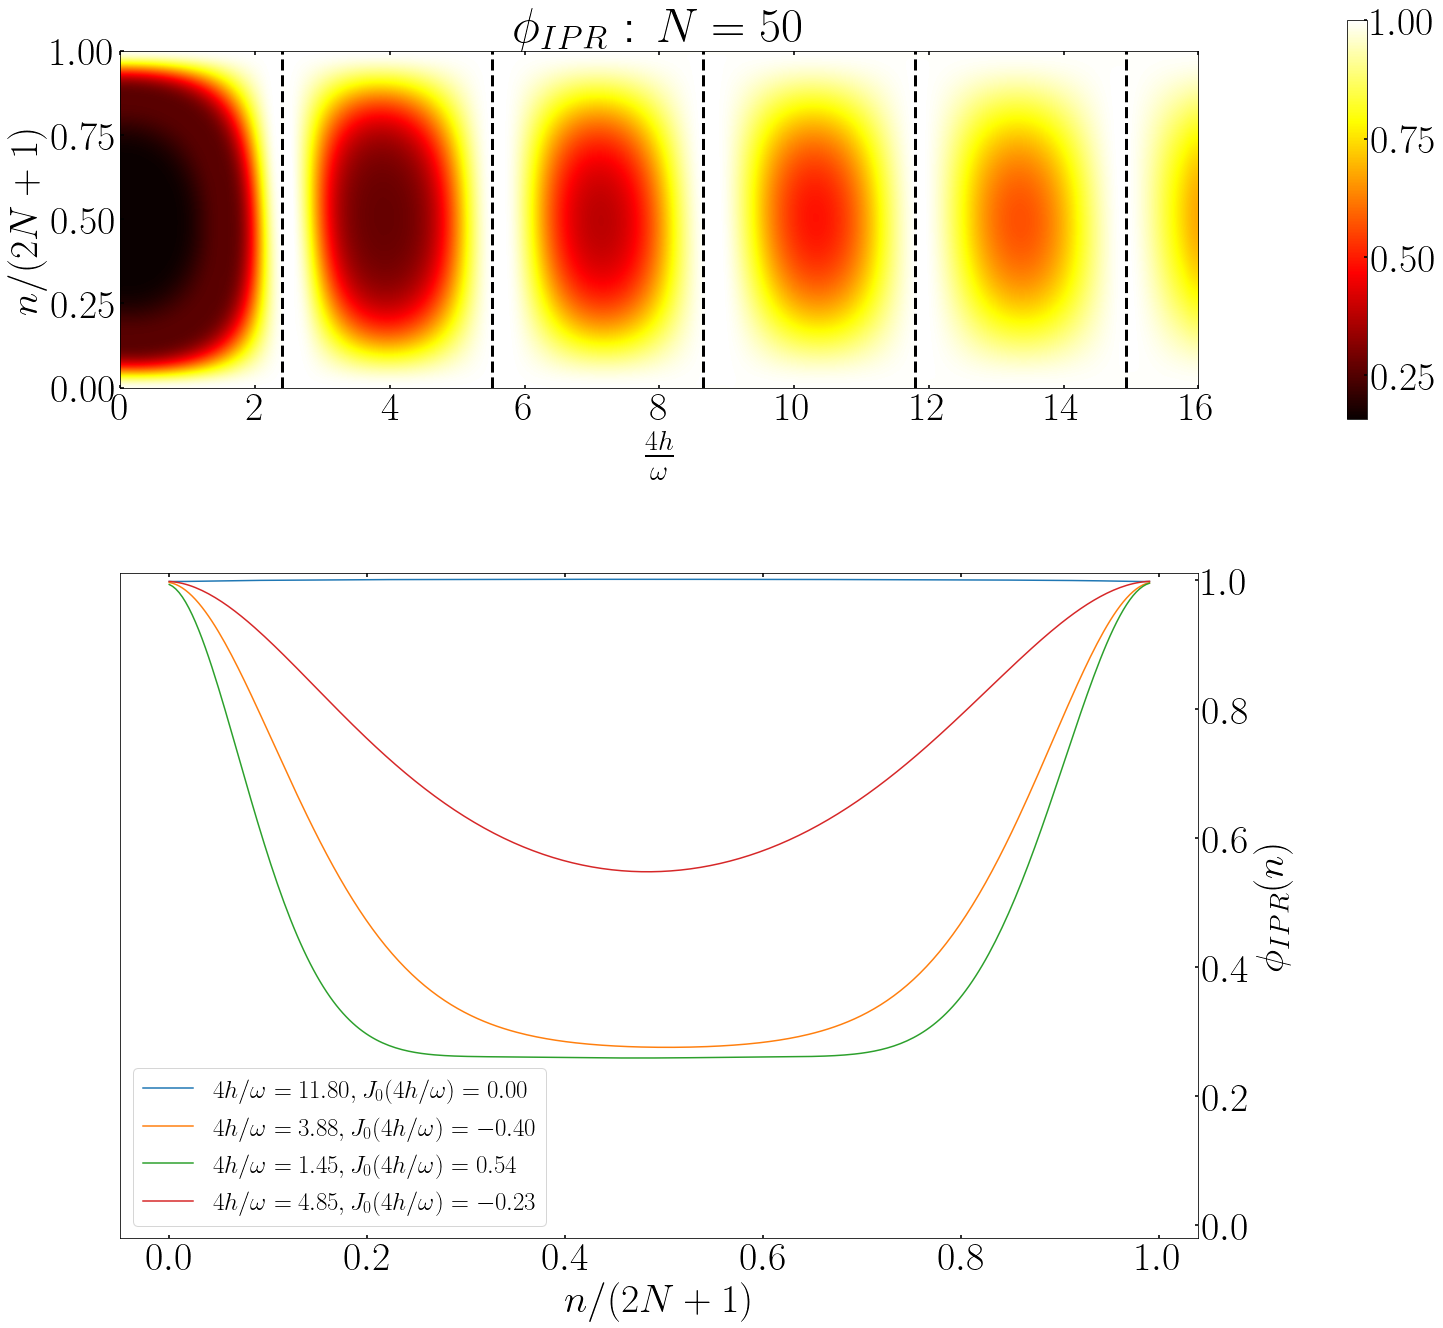

In [6]:
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.09))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend(fontsize=25)
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running for N =  100 with 13 processors


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 28800.89it/s]



 Done. Now calculating PR ...
Exact simulation complete!


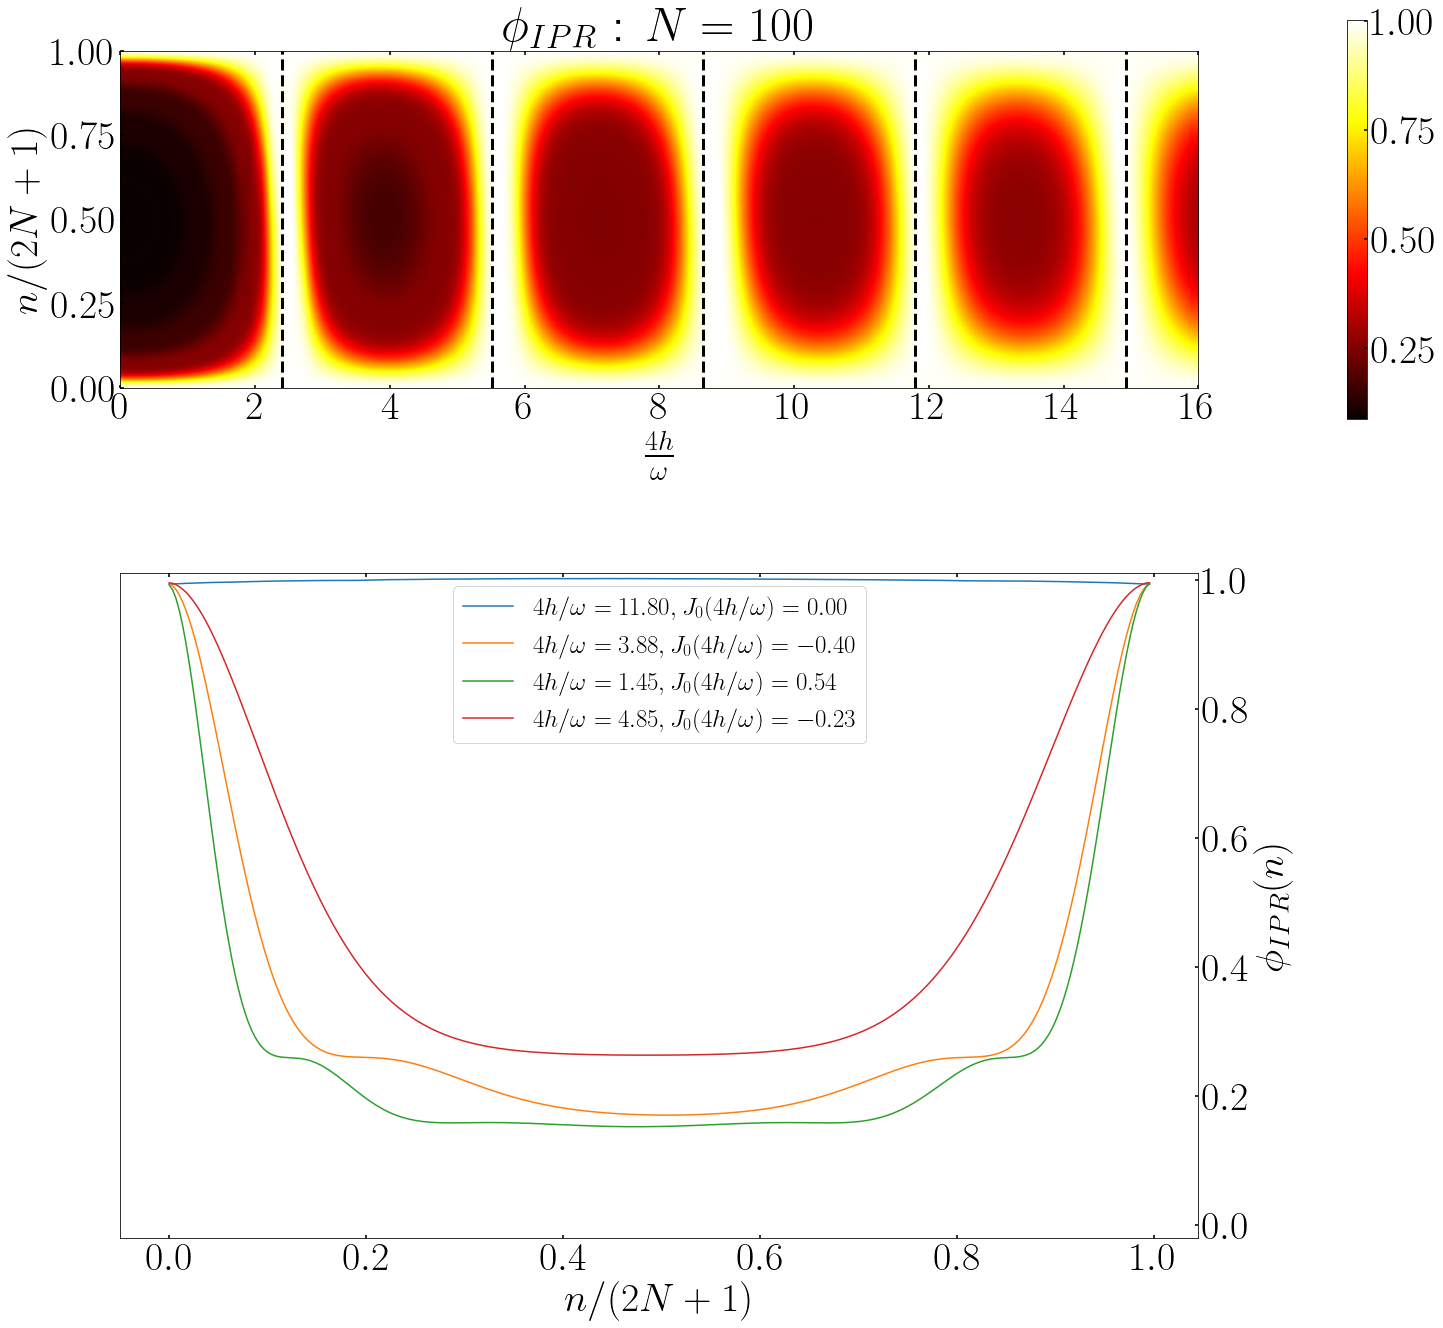

CPU times: user 19.3 s, sys: 591 ms, total: 19.9 s
Wall time: 26min 27s


In [8]:
%%time
%load_ext autoreload
%autoreload 2
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 100
h0 = 0.0
omega = 90
nprocs = 13

w = omega

hsteps = 100
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
evec_f = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    floquet_matrix = Qobj(evec_f[xx]).transform(st)
    iprmat[xx,:] = np.sum(np.abs(np.array(floquet_matrix))**4, axis=1)

print("Exact simulation complete!")
##################################################################################
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5)

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[3], atol=0.009))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.09))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend(fontsize=25)
plt.show()

In the plots above, the top panel is the IPR for different values of $4h/\omega$, where $\omega$ is set to $90$, as before with the Ising case. The ordinate plots $n/(N+1)$, where $n$ is the eigenstate count *i.e.*, $|n\rangle$ is the $n^{th}$ eigenstate of $S^x$ in the TSS subspace. There are a total of $N+1$ spins, where we have looked at $N=25, 50, 70$. After evolving for a time $t=T$, the IPR of the Floquet mode is plotted as a function of $n, 4h/\omega$. The bottom panel plots the IPR as a function of $n/(N+1)$ for a few chosen values of $h$. We can see that, for small sizes at least, the IPR at $J_0(\eta)=0$ is not always unity, but shows a dip in the middle that is not compatible with the RWA approximation. In addition, the edge-$n$ cases seem to not always have a fixed IPR, unlike the Ising case where it's always unity. Could this be some sort of 'scarring'?